In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cubedf = pd.read_csv('cubeData.csv').set_index('cube')

In [5]:
cubedf['v'] = cubedf['x']*cubedf['y']*cubedf['z']
cubedf['ev'] = cubedf['v']*((cubedf['ex']/cubedf['x'])**2+(cubedf['ey']/cubedf['y'])**2+(cubedf['ez']/cubedf['z'])**2)**(.5)
#cubedf

In [6]:
mean = cubedf.groupby('cube').mean()
std = cubedf.groupby('cube').std()
std['counts'] = cubedf.groupby('cube')['section'].count()
std['uncx'] = std['x'] / std['counts']**(.5)
std['uncy'] = std['y'] / std['counts']**(.5)
std['uncz'] = std['z'] / std['counts']**(.5)
std['uncv'] = std['v'] / std['counts']**(.5)

In [7]:
stats = cubedf.mean().to_frame('mean')
stats['std'] = cubedf.std().to_frame()
stats['uncm'] = stats['std'] / len(cubedf)**(.5)
#stats

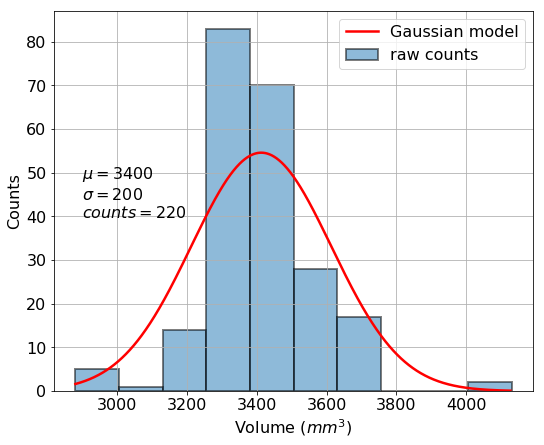

In [8]:
from scipy.stats import norm
plt.figure(figsize=(8.6,7))

matplotlib.rcParams.update({'font.size': 16})

binsize = 125
raw_counts = plt.hist(cubedf['v'], 
                      bins=np.arange(min(cubedf['v']), max(cubedf['v']) + binsize, binsize), 
                      alpha=.5,
                      edgecolor='black',
                      linewidth=2.0,
                      label='raw counts')

x = np.linspace(min(cubedf['v']), max(cubedf['v']), 1000)
mean = stats['mean'].loc['v']
std = stats['mean'].loc['ev']
gaussian = plt.plot(x, binsize*len(cubedf)*norm.pdf(x, mean, std), color='r', linewidth=2.5, label='Gaussian model')

plt.xlabel('Volume ($mm^3$)')
plt.ylabel('Counts')
plt.text(2900, 40, '$\mu=3400$\n$\sigma=200$\n$counts=220$')
plt.legend()
plt.grid(True)
plt.savefig('as2.png')
plt.show()


In [9]:
import scipy.optimize as opt
def gaussian(x, a, m, s):
    return a * np.exp(-(x-m)**2/s**2/2)
binsize = 75
y = cubedf['v'].value_counts(bins=np.arange(min(cubedf['v']), max(cubedf['v']) + binsize, binsize), sort=False).values
x = np.arange(min(cubedf['v']) + binsize/2, max(cubedf['v']), binsize)
unc = [val**.5+.1 for val in y]
#unc = [ for val in y]
p0=(100, 4000, 200)
popt, pcov = opt.curve_fit(f=gaussian, xdata=x, ydata=y, p0=p0, sigma=unc, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
r = y - gaussian(x, *popt)
chisq = sum((r/unc)**2)
nu = 220-3
redchisq = chisq / nu

chisq

81.304895065523553

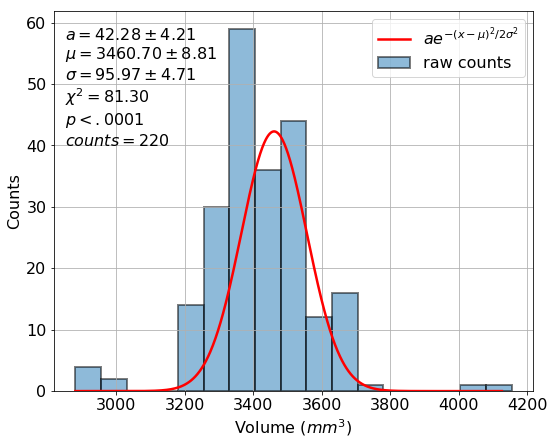

In [29]:
plt.figure(figsize=(8.6,7))

matplotlib.rcParams.update({'font.size': 16})

binsize = 75
raw_counts = plt.hist(cubedf['v'], 
                      bins=np.arange(min(cubedf['v']), max(cubedf['v']) + binsize, binsize), 
                      alpha=.5,
                      edgecolor='black',
                      linewidth=2.0,
                      label='raw counts')

x = np.linspace(min(cubedf['v']), max(cubedf['v']), 1000)
gaussian = plt.plot(x, gaussian(x, *popt), color='r', linewidth=2.5, label='$ae^{-(x-\mu)^2/2\sigma^2}$')

plt.xlabel('Volume ($mm^3$)')
plt.ylabel('Counts')
plt.text(2850, 40, '$a=42.28\pm4.21$\n$\mu=3460.70\pm8.81$\n$\sigma=95.97\pm4.71$\n$\chi^2=81.30$\n$p<.0001$\n$counts=220$')
plt.legend()
plt.grid(True)
plt.savefig('as3.png')
plt.show()